In [14]:
# Copyright (c) Microsoft Corporation. All rights reserved.
# Licensed under the MIT License.

### Install Dependencies

In [ ]:
pip install pandas==1.1.5 requests matplotlib==3.5.2 numpy=1.19.5

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

### Load Data

In [2]:
dataset_url = "https://raw.githubusercontent.com/microsoft/solar-farms-mapping/main/data/solar_farms_india_2021_merged_simplified.geojson"

### Transform Data

In [ ]:
    
r = requests.get(dataset_url)
d = json.loads(r.text)
features = []
for item in d["features"]:
    features.append(item["properties"]) # only get the properties for each Feature object
df = pd.DataFrame(features, columns=["State","Area","Latitude","Longitude","fid"])
states = df["State"].drop_duplicates().sort_values(ascending=True).to_list() # get a sorted state list removing duplicate values
total_solar_areas_per_state = []
total_solar_count_per_state = []
for state in states:
    total_solar_areas_per_state.append(round((df[(df["State"] == state)]["Area"].sum())/10000)) # sum the areas (m2) per state and divide by 10000 to convert from m2 to hectares
    total_solar_count_per_state.append((df["State"] == state).sum()) # sum the number of solar farms per state

# print values as a reference
print(states)
print(total_solar_areas_per_state)
print(total_solar_count_per_state)

### Plot Solar Farms India Data

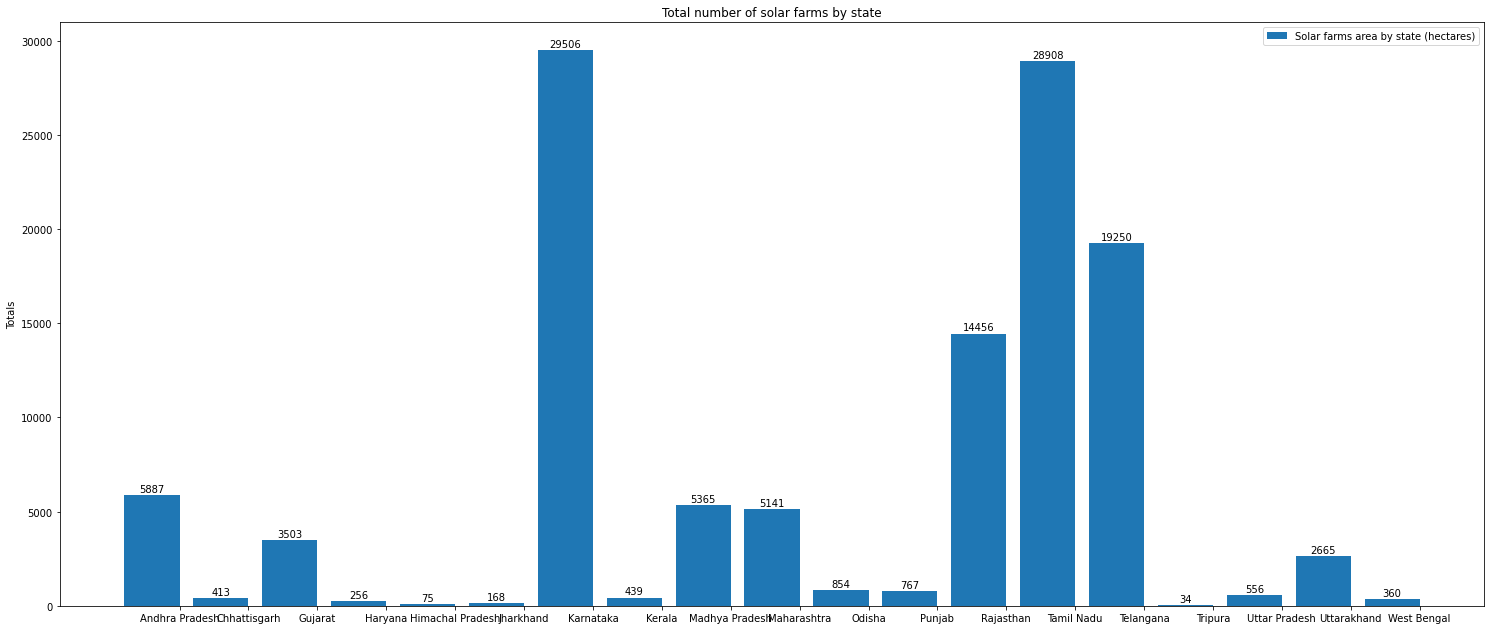

In [28]:
x = np.arange(len(states))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total_solar_areas_per_state, width, label='Solar farms area by state (hectares)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Totals')
ax.set_title('Total number of solar farms by state')
ax.set_xticks(x, states)
ax.legend()

ax.bar_label(rects1, padding=1)

fig.tight_layout()
fig.set_size_inches(25, 10)

plt.show()

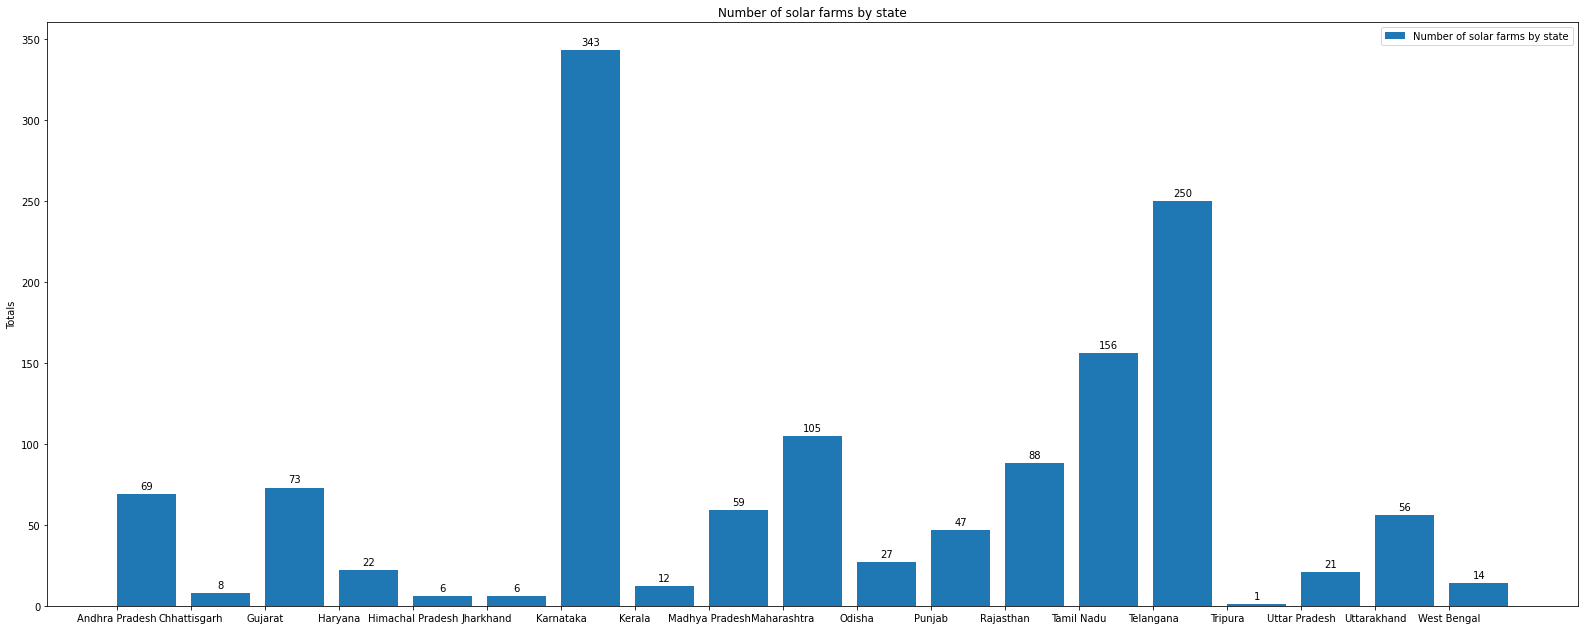

In [27]:
x = np.arange(len(states))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, total_solar_count_per_state, width, label='Number of solar farms by state')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Totals')
ax.set_title('Number of solar farms by state')
ax.set_xticks(x, states)
ax.legend()

ax.bar_label(rects1, padding=3)

fig.tight_layout()
fig.set_size_inches(25, 10)

plt.show()